# MNIST 예제 - 신경망

In [2]:
import keras
keras.__version__

'2.4.3'

In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# Training data

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Test data

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# 시각화

In [10]:
import matplotlib.pyplot as plt

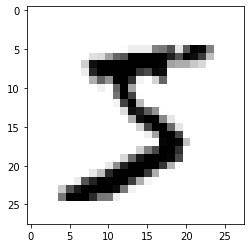

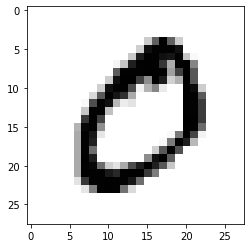

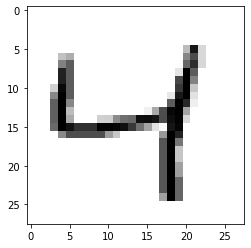

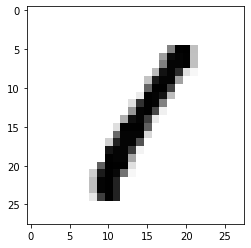

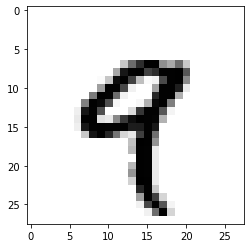

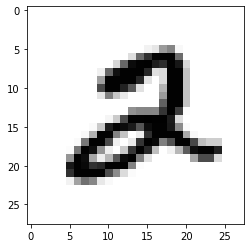

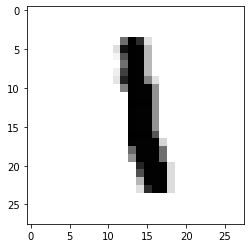

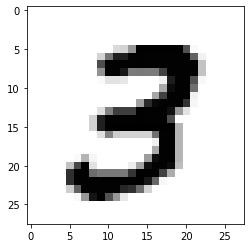

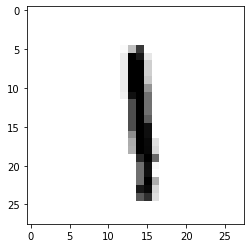

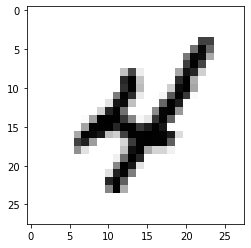

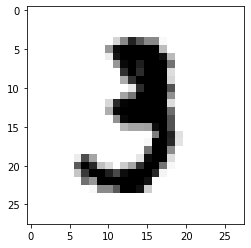

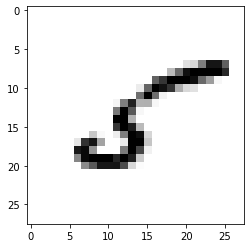

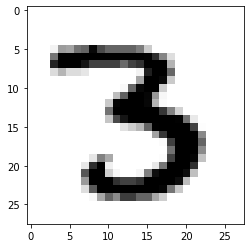

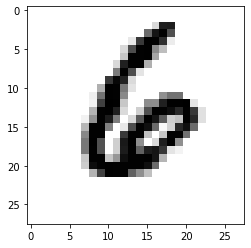

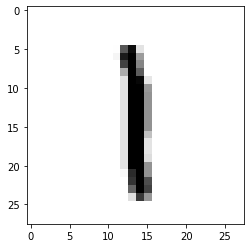

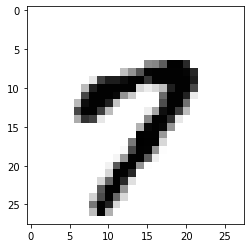

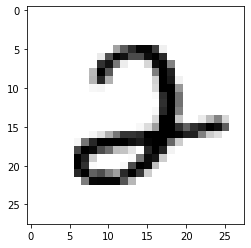

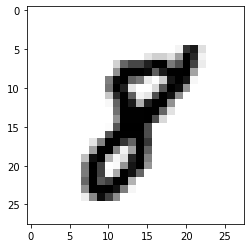

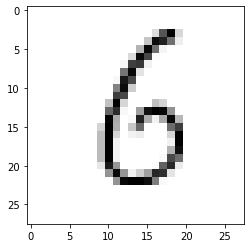

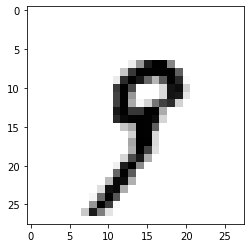

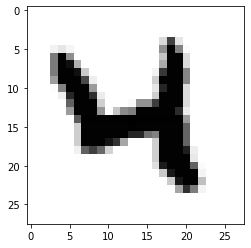

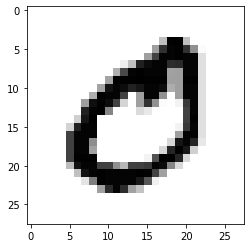

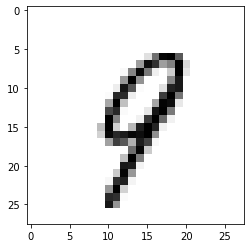

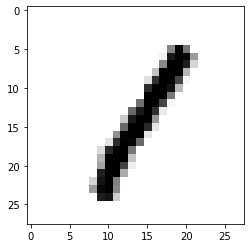

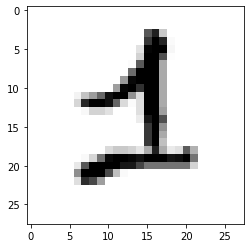

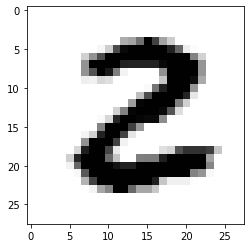

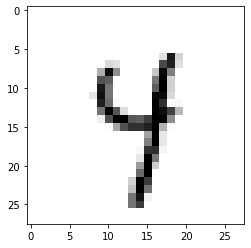

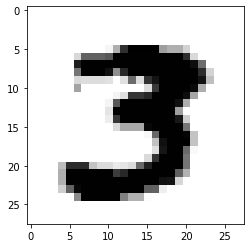

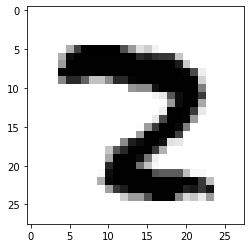

KeyboardInterrupt: ignored

In [14]:
digit = train_images[3]

fig=plt.figure(100,24)
for i in range(100):
  fig.subplots
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.show()

# 신경망 생성

In [15]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [16]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [17]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Label  to  categorical data

In [18]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Training

In [19]:
original_hist = network.fit(train_images, train_labels,
                            epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 9ms/step - loss: 0.2901 - accuracy: 0.9156 - val_loss: 0.1533 - val_accuracy: 0.9547
Epoch 2/20
375/375 [==============================] - 3s 9ms/step - loss: 0.1199 - accuracy: 0.9647 - val_loss: 0.1146 - val_accuracy: 0.9661
Epoch 3/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0781 - accuracy: 0.9770 - val_loss: 0.0911 - val_accuracy: 0.9713
Epoch 4/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0552 - accuracy: 0.9836 - val_loss: 0.0818 - val_accuracy: 0.9747
Epoch 5/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0413 - accuracy: 0.9873 - val_loss: 0.0787 - val_accuracy: 0.9764
Epoch 6/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0305 - accuracy: 0.9914 - val_loss: 0.0739 - val_accuracy: 0.9788
Epoch 7/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0236 - accuracy: 0.9930 - val_loss: 0.0838 - val_accuracy: 0.9769
Epoch 

In [20]:
original_hist = network.fit(train_images, train_labels,
                            epochs=20, batch_size=256, validation_split=0.2)

Epoch 1/7
375/375 [==============================] - 3s 8ms/step - loss: 6.7262e-04 - accuracy: 0.9999 - val_loss: 0.1198 - val_accuracy: 0.9803
Epoch 2/7
375/375 [==============================] - 3s 9ms/step - loss: 4.6884e-04 - accuracy: 0.9999 - val_loss: 0.1192 - val_accuracy: 0.9803
Epoch 3/7
375/375 [==============================] - 3s 8ms/step - loss: 3.8104e-04 - accuracy: 0.9999 - val_loss: 0.1296 - val_accuracy: 0.9805
Epoch 4/7
375/375 [==============================] - 3s 8ms/step - loss: 3.0009e-04 - accuracy: 0.9999 - val_loss: 0.1279 - val_accuracy: 0.9803
Epoch 5/7
375/375 [==============================] - 3s 8ms/step - loss: 3.5625e-04 - accuracy: 0.9999 - val_loss: 0.1255 - val_accuracy: 0.9807
Epoch 6/7
375/375 [==============================] - 3s 8ms/step - loss: 1.5576e-04 - accuracy: 1.0000 - val_loss: 0.1345 - val_accuracy: 0.9796
Epoch 7/7
375/375 [==============================] - 3s 9ms/step - loss: 1.9951e-04 - accuracy: 1.0000 - val_loss: 0.1420 - val_ac

In [21]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1273 - accuracy: 0.9814
test_acc: 0.9814000129699707


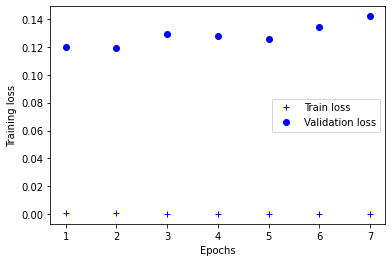

In [22]:
original_train_loss = original_hist.history['loss']
original_val_loss = original_hist.history['val_loss']

epochs = range(1, len(original_train_loss) + 1)

plt.plot(epochs, original_train_loss, 'b+', label='Train loss')
plt.plot(epochs, original_val_loss, 'bo', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

# 워크샾 시작! 여기서부터 시작하세요~ 

### 오버피팅 문제를 해결하기 위해 L2 Regularizer 를 적용해보세요. 
- L2 Regularizer 적용

In [31]:
# L2 regularizer 적용하여 모델링하고 학습을 시켜 보세요. 

from keras import models
from keras import layers
from keras import regularizers


l1_model = models.Sequential()
l1_model.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu',  input_shape=(28 * 28,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu' ,input_shape=(28 * 28,)) )
l1_model.add(layers.Dense(10, kernel_regularizer=regularizers.l1(0.0001),
                          activation='softmax'))
l1_model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [34]:
l1_hist = l1_model.fit(train_images, train_labels,
                            epochs=20, batch_size=256, validation_split=0.2)


Epoch 1/20
375/375 [==============================] - 4s 10ms/step - loss: 0.2403 - accuracy: 0.9742 - val_loss: 0.2381 - val_accuracy: 0.9744
Epoch 2/20
375/375 [==============================] - 4s 10ms/step - loss: 0.2269 - accuracy: 0.9766 - val_loss: 0.2294 - val_accuracy: 0.9753
Epoch 3/20
375/375 [==============================] - 4s 10ms/step - loss: 0.2179 - accuracy: 0.9769 - val_loss: 0.2433 - val_accuracy: 0.9705
Epoch 4/20
375/375 [==============================] - 4s 10ms/step - loss: 0.2097 - accuracy: 0.9781 - val_loss: 0.2235 - val_accuracy: 0.9748
Epoch 5/20
375/375 [==============================] - 4s 10ms/step - loss: 0.2034 - accuracy: 0.9792 - val_loss: 0.2189 - val_accuracy: 0.9729
Epoch 6/20
375/375 [==============================] - 4s 11ms/step - loss: 0.1978 - accuracy: 0.9799 - val_loss: 0.2111 - val_accuracy: 0.9763
Epoch 7/20
375/375 [==============================] - 4s 10ms/step - loss: 0.1926 - accuracy: 0.9804 - val_loss: 0.2151 - val_accuracy: 0.9749

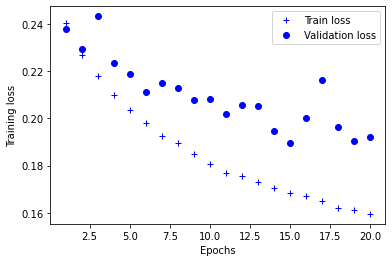

In [35]:
# 위의 결과에 대해 Loss를 시각화해보세요. 


original_train_loss = l1_hist.history['loss']
original_val_loss = l1_hist.history['val_loss']

epochs = range(1, len(original_train_loss) + 1)

plt.plot(epochs, original_train_loss, 'b+', label='Train loss')
plt.plot(epochs, original_val_loss, 'bo', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()


In [36]:
# 학습한 모델을 평가해보세요(evaluate)

test_loss, test_acc = l1_model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)



313/313 [==============================] - 1s 2ms/step - loss: 0.1864 - accuracy: 0.9774
test_acc: 0.977400004863739


### 오버피팅 문제 해결 하기 위해 L1_L2 regularizer 를 적용해보세요 
- L1_L2 regularizer 적용 

In [38]:
# L1_L2 regularizer 적용하여 모델링하고, 학습을 진행하세요.  



from keras import models
from keras import layers
from keras import regularizers


l1_l2_model = models.Sequential()
l1_l2_model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(0.0001),
                          activation='relu',  input_shape=(28 * 28,)))
l1_l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu' ,input_shape=(28 * 28,)) )
l1_l2_model.add(layers.Dense(10, kernel_regularizer=regularizers.l1_l2(0.0001),
                          activation='softmax'))
l1_l2_model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])



In [40]:
l1_l2_hist = l1_l2_model.fit(train_images, train_labels,
                            epochs=20, batch_size=256, validation_split=0.2)


Epoch 1/20
188/188 [==============================] - 3s 16ms/step - loss: 2.0387 - accuracy: 0.8280 - val_loss: 0.9130 - val_accuracy: 0.8852
Epoch 2/20
188/188 [==============================] - 3s 15ms/step - loss: 0.8308 - accuracy: 0.8931 - val_loss: 0.7467 - val_accuracy: 0.9032
Epoch 3/20
188/188 [==============================] - 3s 15ms/step - loss: 0.7407 - accuracy: 0.9048 - val_loss: 0.6654 - val_accuracy: 0.9227
Epoch 4/20
188/188 [==============================] - 3s 15ms/step - loss: 0.6960 - accuracy: 0.9118 - val_loss: 0.7244 - val_accuracy: 0.9053
Epoch 5/20
188/188 [==============================] - 3s 15ms/step - loss: 0.6620 - accuracy: 0.9177 - val_loss: 0.6509 - val_accuracy: 0.9241
Epoch 6/20
188/188 [==============================] - 3s 15ms/step - loss: 0.6316 - accuracy: 0.9248 - val_loss: 0.6356 - val_accuracy: 0.9180
Epoch 7/20
188/188 [==============================] - 3s 15ms/step - loss: 0.6104 - accuracy: 0.9280 - val_loss: 0.5817 - val_accuracy: 0.9338

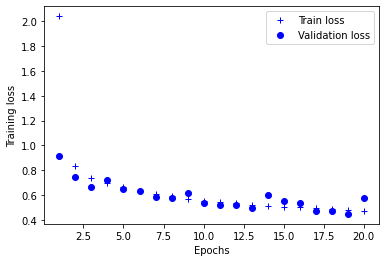

In [41]:
#위의 결과에 대해 Loss를 시각화해 보세요. 


original_train_loss = l1_l2_hist.history['loss']
original_val_loss = l1_l2_hist.history['val_loss']

epochs = range(1, len(original_train_loss) + 1)

plt.plot(epochs, original_train_loss, 'b+', label='Train loss')
plt.plot(epochs, original_val_loss, 'bo', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()




In [42]:
# 위의 학습한 모델을 평가하세요.(evaluate)


test_loss, test_acc = l1_l2_model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.5883 - accuracy: 0.9038
test_acc: 0.9038000106811523


### 3개층으로 더 Deep한 네트워크로 학습해보기 

In [48]:
# 층을 하나 더 쌓아 더 딥한 네트워크로 모델링하고 학습시켜 보세요. 
from keras import models
from keras import layers
from keras import regularizers

l1_l2_deep_model = models.Sequential()
l1_l2_deep_model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(0.0001),
                          activation='relu',  input_shape=(28 * 28,)))
l1_l2_deep_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(0.0001),
                          activation='relu' ,input_shape=(28 * 28,)) )
l1_l2_deep_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(0.0001),
                          activation='relu' ,input_shape=(28 * 28,)) )
l1_l2_deep_model.add(layers.Dense(10, kernel_regularizer=regularizers.l1_l2(0.0001),
                          activation='softmax'))
l1_l2_deep_model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])



In [49]:
l1_l2_deep_model = l1_l2_deep_model.fit(train_images, train_labels,
                            epochs=20, batch_size=256, validation_split=0.2)


Epoch 1/20
188/188 [==============================] - 3s 17ms/step - loss: 2.4839 - accuracy: 0.7419 - val_loss: 1.3844 - val_accuracy: 0.8259
Epoch 2/20
188/188 [==============================] - 3s 15ms/step - loss: 1.2395 - accuracy: 0.8557 - val_loss: 1.1818 - val_accuracy: 0.8646
Epoch 3/20
188/188 [==============================] - 3s 15ms/step - loss: 1.1380 - accuracy: 0.8711 - val_loss: 1.2066 - val_accuracy: 0.8343
Epoch 4/20
188/188 [==============================] - 3s 16ms/step - loss: 1.0843 - accuracy: 0.8791 - val_loss: 1.0231 - val_accuracy: 0.8975
Epoch 5/20
188/188 [==============================] - 3s 16ms/step - loss: 1.0483 - accuracy: 0.8877 - val_loss: 1.0177 - val_accuracy: 0.8954
Epoch 6/20
188/188 [==============================] - 3s 16ms/step - loss: 1.0192 - accuracy: 0.8944 - val_loss: 1.0062 - val_accuracy: 0.8956
Epoch 7/20
188/188 [==============================] - 3s 16ms/step - loss: 0.9955 - accuracy: 0.9003 - val_loss: 1.0154 - val_accuracy: 0.8848

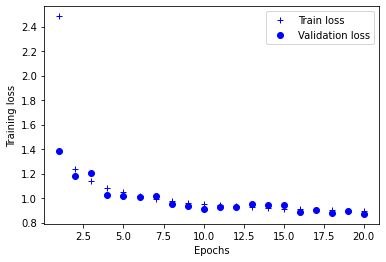

In [50]:
# 위의 학습 결과에 대해 LOSS를 시각화 해보세요. 

original_train_loss = l1_l2_deep_model.history['loss']
original_val_loss = l1_l2_deep_model.history['val_loss']

epochs = range(1, len(original_train_loss) + 1)

plt.plot(epochs, original_train_loss, 'b+', label='Train loss')
plt.plot(epochs, original_val_loss, 'bo', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()




### 오버피팅을 해결하기 위해 dropout 적용 

In [ ]:
# 위에서 사용한 같은 아키텍쳐의 모델에 DROPOUT을 적용하여 모델링하고 
# 학습을 진행하세요. 

from keras import models
from keras import layers
from keras import regularizers


dpt_model = models.Sequential()
dpt_model.add(layers.Dense(512,activation='relu',  input_shape=(28 * 28,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu' ,input_shape=(28 * 28,)) )
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu' ,input_shape=(28 * 28,)) )
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(10, activation='softmax'))
dpt_model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

dpt_hist = dpt_model.fit(train_images, train_labels,
                            epochs=20, batch_size=256, validation_split=0.2)


Epoch 1/20
375/375 [==============================] - 7s 19ms/step - loss: 0.3704 - accuracy: 0.8858 - val_loss: 0.1493 - val_accuracy: 0.9548
Epoch 2/20
375/375 [==============================] - 7s 18ms/step - loss: 0.1793 - accuracy: 0.9461 - val_loss: 0.1109 - val_accuracy: 0.9667
Epoch 3/20
375/375 [==============================] - 7s 18ms/step - loss: 0.1436 - accuracy: 0.9584 - val_loss: 0.0991 - val_accuracy: 0.9722
Epoch 4/20
375/375 [==============================] - 7s 18ms/step - loss: 0.1206 - accuracy: 0.9654 - val_loss: 0.1048 - val_accuracy: 0.9716
Epoch 5/20
375/375 [==============================] - 7s 18ms/step - loss: 0.1125 - accuracy: 0.9678 - val_loss: 0.1023 - val_accuracy: 0.9754
Epoch 6/20
375/375 [==============================] - 6s 17ms/step - loss: 0.1016 - accuracy: 0.9712 - val_loss: 0.1010 - val_accuracy: 0.9746
Epoch 7/20
375/375 [==============================] - 7s 17ms/step - loss: 0.0951 - accuracy: 0.9732 - val_loss: 0.1026 - val_accuracy: 0.9780

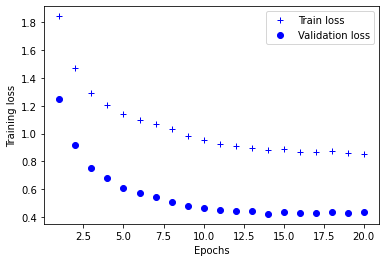

In [45]:
# 위의 학습 결과에 대해 LOSS를 시각화 해보세요. 

original_train_loss = dpt_hist.history['loss']
original_val_loss = dpt_hist.history['val_loss']

epochs = range(1, len(original_train_loss) + 1)

plt.plot(epochs, original_train_loss, 'b+', label='Train loss')
plt.plot(epochs, original_val_loss, 'bo', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()




In [47]:
# 위의 결과에 대해 테스트 데이터로 모델을 평가하세요(Evaluate) 

test_loss, test_acc = dpt_model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.4925 - accuracy: 0.8589
test_acc: 0.8589000105857849
